In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci

A heat Equation is a partial differential equation involving 
space and time as variables. Heat is dependent on x,y,z and time.

##### Form of heat Equation:

##### $ A(x,y)\frac{\delta^2 u}{\delta x^2} + B(x,y)\frac{\delta^2 u}{\delta y^2} + C(x,y)\frac{\delta^2 u}{\delta x \delta y} = F(x,y,u,u_x,u_y) $
where u-Heat , $u_x - \frac{\delta u}{\delta x}, u_y - \frac{\delta u}{\delta y} , u_t - \frac{\delta u}{\delta t}$ <br>
and u-Heat , $u_{xx} - \frac{\delta^2 u}{\delta x^2}, u_{yy} - \frac{\delta^2 u}{\delta y^2} , u_{xy} - \frac{\delta^2 u}{\delta x \delta y}$

So, for A=D=1 {Given} , B=C=0 -><br> 
Heat Diffusion equation reduces to :  $u_t = D u_{xx}$

In [2]:
#np.set_printoptions(suppress=True)

n = 101
Length = 4;Time = 10
hx = 0.5;ht = Time/(n-1)
r = ht/(hx**2)

x = np.arange(0,Length+hx,hx)
nx = int(Length/hx)

t = np.linspace(0,Time,n)

u = np.zeros((len(x),len(t)),dtype='float64') # x,t variation

X,_ = np.meshgrid(x,np.zeros_like(t))
_,T = np.meshgrid(np.zeros_like(x),t)

Note : if you want mesh grid to be row-X,column as Y then u(time,length) or viceversa

In [3]:
# Given :
for i in range(len(x)):
    u[i,0] = np.sin(np.pi*x[i]/Length)
index_x1 = np.argwhere(x==1)[0][0]
for j in range(len(t)):
    u[0,j] = 0
    u[index_x1,j] = 0

# or  u[0,:] = 0
#    u[index_x1,:] = 0

# Matrices_ dimension must match x
A = np.zeros((nx+1,nx+1))
B = np.zeros((nx+1,nx+1))

for i in range(nx):
    A[i,i] = 2+2*r
    A[i,i+1] = A[i+1,i] = -r
    B[i,i] = 2-2*r
    B[i,i+1] = B[i+1,i] = r
A[-1,-1] = 2+2*r
B[-1,-1] = 2-2*r

In [4]:
#  solving for u
for j in range(len(t) - 1):
    u[0, j + 1] = u[0, j]
    u[1:nx, j + 1] = np.linalg.solve(A[1:nx, 1:nx],np.dot(B[1:nx, 1:nx], u[1:nx, j]))
    u[nx, j + 1] = u[nx, j]


##### Plot:

(9, 101)


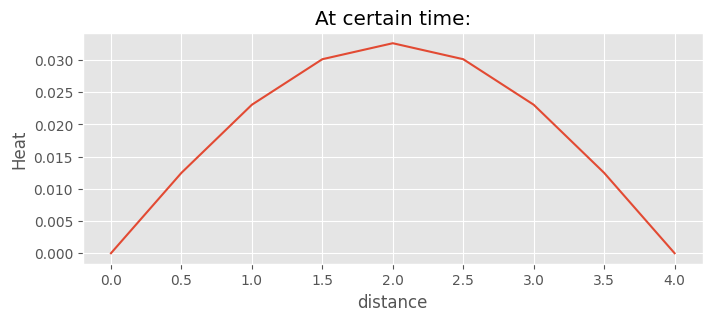

In [5]:
print(u.shape)

plt.figure(figsize = (8,3))
plt.style.use('ggplot')

plt.title('At certain time:')
plt.plot(x,u[:,54])
plt.xlabel('distance')
plt.ylabel('Heat')
plt.show()

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


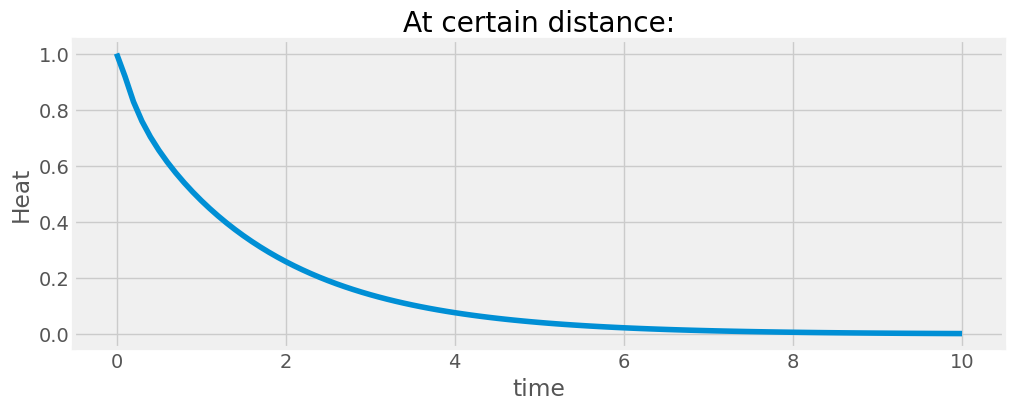

In [6]:
plt.figure(figsize = (12,4))
print(plt.style.available)
plt.style.use('fivethirtyeight')

plt.title('At certain distance:')
plt.plot(t,u[4,:])
plt.xlabel('time')
plt.ylabel('Heat')
plt.show()